<a href="https://colab.research.google.com/github/SaurabhSSB/statistics_basics/blob/main/src/practical_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## Measure of Central Tendency

###1. Mean

###2. Median

###3. Mode

In [ ]:
age_data=[23,24,32,45,12,43,67,45,32,56,32,120]

In [ ]:
import numpy as np
mean= np.mean(age_data)
median= np.median(age_data)
print(f"Mean of the data is {mean}.")
print(f"Median of the data is {median}.")

Mean of the data is 44.25.
Median of the data is 37.5.


In [ ]:
import statistics
print(statistics.mean(age_data))
print(statistics.median(age_data))

44.25
37.5


In [ ]:
mode= statistics.mode(age_data)
print(f"Mode fo the data is {mode}.")

Mode fo the data is 32.


<Axes: >

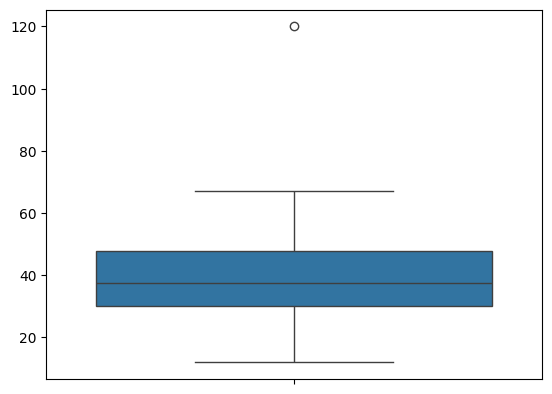

In [ ]:
import seaborn as sns
sns.boxplot(age_data)

In [ ]:
# Five Number Summary
q1,q3= np.percentile(age_data,[25,75])
print(f"q1= {q1}, q3= {q3}")

q1= 30.0, q3= 47.75


In [ ]:
# Check Outliers [Lower fence and Higher fence]
IQR= q3-q1
lower_fence= q1 - 1.5 * IQR
higher_fence= q3 + 1.5 * IQR
print(f"Lower_fence: {lower_fence}\nHigher_fence: {higher_fence}")

Lower_fence: 3.375
Higher_fence: 74.375


## Measure of Dispersion
### 1. Variance

### 2. Standard Deviation

In [ ]:
variance= statistics.variance(age_data)
print(variance)

795.2954545454545


In [ ]:
np.var(age_data,axis=0) # For Population Variance

729.0208333333334

In [ ]:
statistics.pvariance(age_data) # For Population Variance

729.0208333333334

In [ ]:
import math
std= math.sqrt(variance)
print(f"Standard Deviation is: {std}")
print(f"Standard Deviation of populations is: {math.sqrt(statistics.pvariance(age_data))}")

Standard Deviation is: 28.2009832194811
Standard Deviation of populations is: 27.000385799712813


## Histograms and PDF

<Axes: ylabel='Count'>

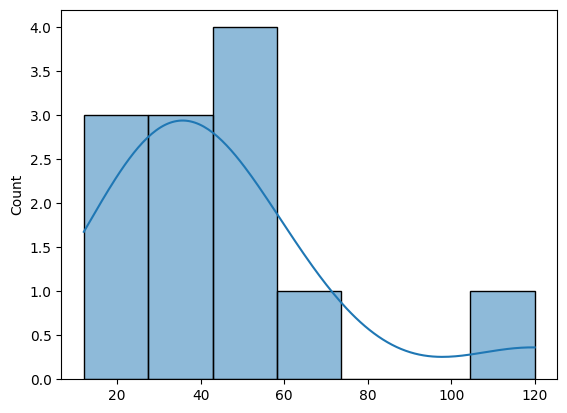

In [ ]:
import seaborn as sns
sns.histplot(age_data,kde= True)

In [ ]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

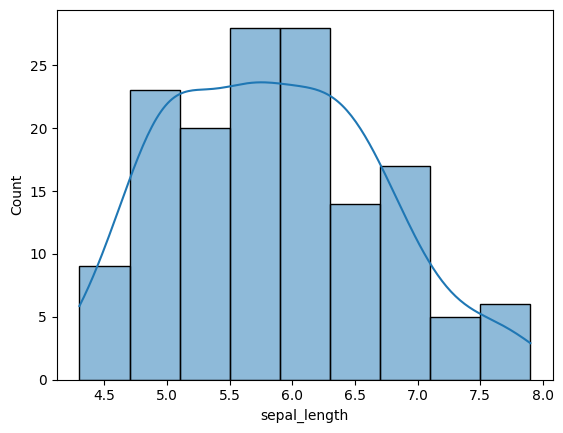

In [ ]:
sns.histplot(df['sepal_length'],kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

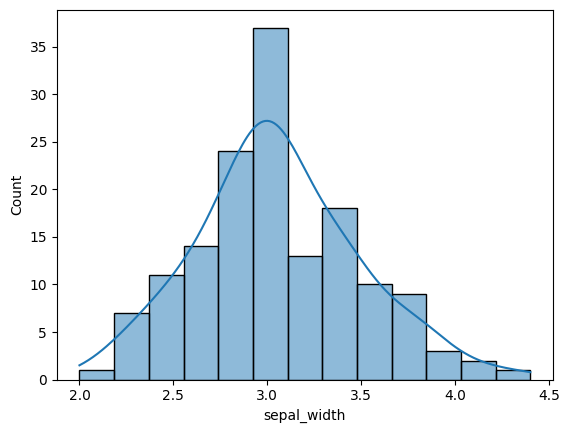

In [ ]:
sns.histplot(df['sepal_width'],kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

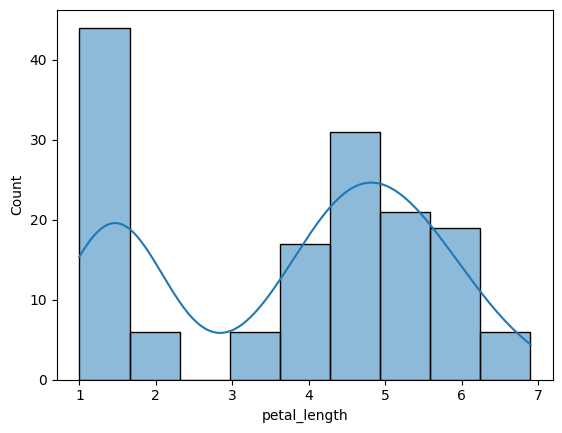

In [ ]:
sns.histplot(df['petal_length'],kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

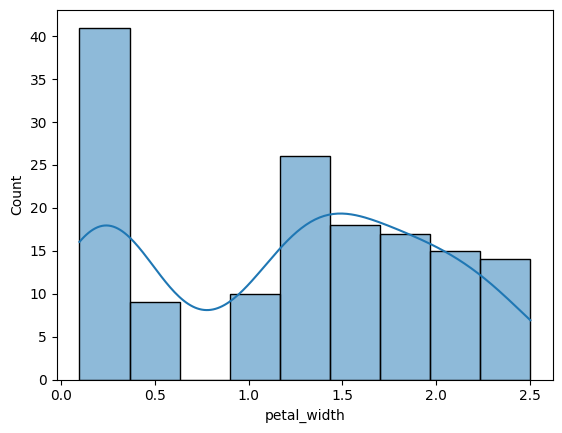

In [ ]:
sns.histplot(df['petal_width'],kde=True)

In [ ]:
# Normal Distribution
x= np.random.normal(0.5,0.2,1000) ## 0.5 is mean and 0.2 is std

<Axes: ylabel='Count'>

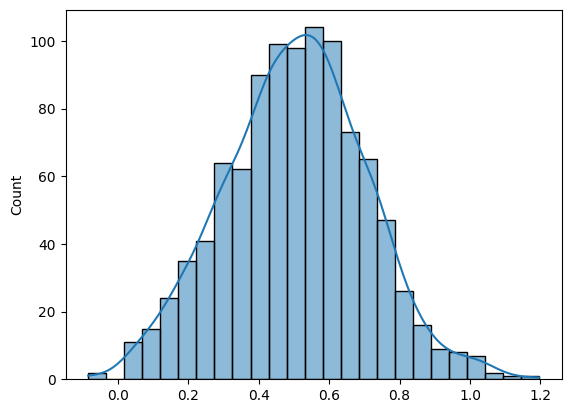

In [ ]:
sns.histplot(x,kde= True)

<Axes: ylabel='Count'>

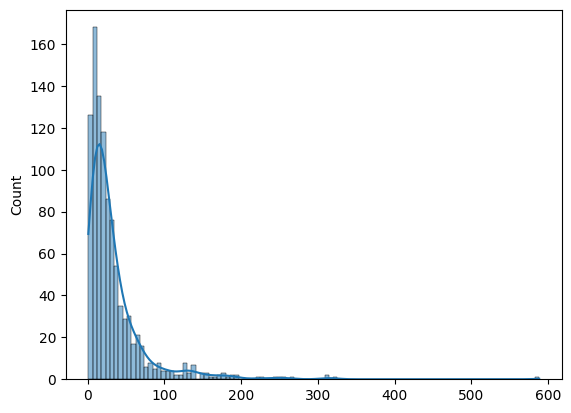

In [ ]:
# Log Normal Distribution
x_log= np.random.lognormal(3,1,1000)
sns.histplot(x_log, kde=True)

<Axes: ylabel='Count'>

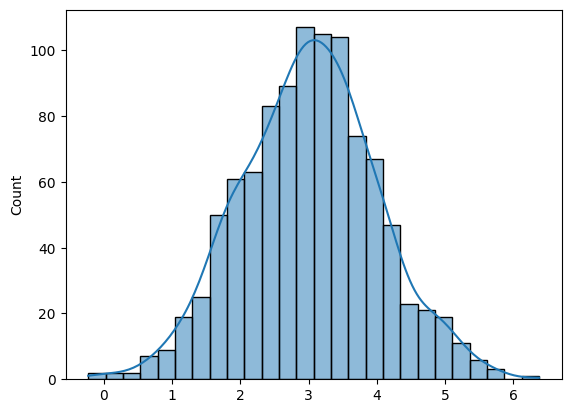

In [ ]:
sns.histplot(np.log(x_log),kde= True)

## Checking for noraml distribution